# Machine Learning Project: Clusterization of Insurance Clients
### David García Allo - 19/03/2022 
### Latest update: 15/07/2022
#### Description
Classify the Belgium traffic signs data set with a Neural Network. We download the data from the given url, save it locally $\\$
to avoid futures downloads and resize the data to visualize the traffic signs. Then build the NN with 3 hidden layers and $\\$
remember to flatten the output to 62 (number of different traffic signs) and obtain the accuracy on the test sample.

#### External modules needed
- numpy
- matplotlib
- scikit-image (skimage)
- tensorflow

#### Comments
We obtain good accuracy, around 90% and we were able to reduce the trainable parameter from ~5million down to ~0.8million wich $\\$
wich reduces considerably the execution time, in my case from 6min down to 20secs, and that it's amaizing. I just flatten the $\\$
array at the input instead of output. $\\$ 
Note: I think it's valid to flatten the input, I'll try to check it to be 100% sure it's correct. 


### Needed imports

In [1]:
import os, urllib, zipfile

import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

from skimage import transform
from skimage.io import imread

import tensorflow        as tf
from tensorflow          import keras

### Downloading the traffic signs data if needed and loading the Train and Test samples

In [2]:
# Download the data only if we haven't download already
HOME = "BelgiumTSC"
if not (os.path.exists(HOME + "/Testing") and os.path.exists(HOME + "/Training")):
    if not os.path.exists(HOME): os.mkdir(HOME)
    for file in ["BelgiumTSC_Training.zip", "BelgiumTSC_Testing.zip"]: #Loop to unzip data and remove zip files
        urllib.request.urlretrieve("https://btsd.ethz.ch/shareddata/BelgiumTSC/" + file, HOME + "/" + file)
        with zipfile.ZipFile(HOME + "/" + file, 'r') as zip_ref: zip_ref.extractall(HOME)
        os.system("rm -r " + HOME + "/" + file)

# Data stored on different directories inside the main directories of train and test
# Load Training data
directories = os.listdir('./BelgiumTSC/Training')
images = []
labels = []
for d in directories[:-1]:
    file_names = os.listdir('./BelgiumTSC/Training/' + d)
    for f in file_names[:-1]:
        images.append(imread('./BelgiumTSC/Training/' + d + '/' + f))
        labels.append(int(d))

# Load Testing data
directories = os.listdir('./BelgiumTSC/Testing')
imagesTest = []
labelsTest = []
for d in directories[:-1]:
    file_names = os.listdir('./BelgiumTSC/Testing/' + d)
    for f in file_names[:-1]:
        imagesTest.append(imread('./BelgiumTSC/Testing/' + d + '/' + f))
        labelsTest.append(int(d))

### Visualizing data

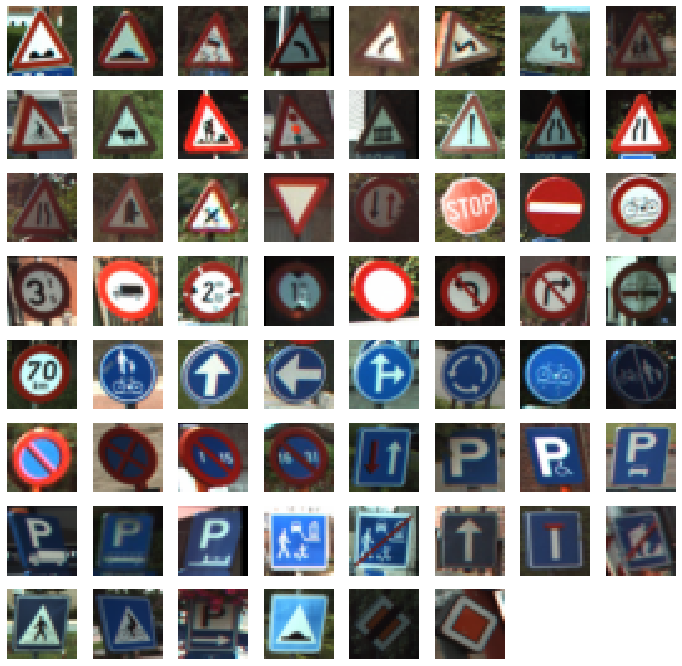

In [3]:
# Rescale the images to have same dimensions and convert to array
images28     = [transform.resize(image, (28, 28)) for image in images]
images28Test = [transform.resize(image, (28, 28)) for image in imagesTest]

# Plot one image per instace (62 different signs)
rows = 8
cols = 8
plt.figure(figsize=(1.5*rows,1.5*cols))

unique_labels = list(set(labels))   #set(labels) returns a {} with all unique labels -> easy to use it as a list
for i in range(len(unique_labels)):
    plt.subplot(rows, cols, i+1)
    plt.axis('off')
    image = images28[labels.index(unique_labels[i])] #we can also use images instead images28 to see original images
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
plt.show()

### Transform the data into arrays

In [4]:
images28     = np.array(images28)
images28Test = np.array(images28Test)
labels       = np.array(labels)
labelsTest   = np.array(labelsTest)

### Build the Neural Network model

In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential(name="SequentialNeuralNetwork")
#model.add(keras.layers.Flatten(input_shape=images28.shape[1:],name="Input"))
model.add(keras.layers.Input(shape=images28.shape[1:],name="Input"))
model.add(keras.layers.Dense(300, activation="relu", name="HiddenLayer300"))
model.add(keras.layers.Dense(150, activation="relu", name="HiddenLayer150"))
model.add(keras.layers.Dense(100, activation="relu", name="HiddenLayer100"))

model.summary()

Model: "SequentialNeuralNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer300 (Dense)      (None, 28, 28, 300)       1200      
                                                                 
 HiddenLayer150 (Dense)      (None, 28, 28, 150)       45150     
                                                                 
 HiddenLayer100 (Dense)      (None, 28, 28, 100)       15100     
                                                                 
Total params: 61,450
Trainable params: 61,450
Non-trainable params: 0
_________________________________________________________________


### Remember to flatten the output

In [6]:
model.add(keras.layers.Flatten(name="FlattenOutput"))
model.add(keras.layers.Dense(62, activation="softmax", name="Output"))
model.summary()

Model: "SequentialNeuralNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer300 (Dense)      (None, 28, 28, 300)       1200      
                                                                 
 HiddenLayer150 (Dense)      (None, 28, 28, 150)       45150     
                                                                 
 HiddenLayer100 (Dense)      (None, 28, 28, 100)       15100     
                                                                 
 FlattenOutput (Flatten)     (None, 78400)             0         
                                                                 
 Output (Dense)              (None, 62)                4860862   
                                                                 
Total params: 4,922,312
Trainable params: 4,922,312
Non-trainable params: 0
_________________________________________________________________


### Adding a GradientDescentOptimizer and EarlyStop if the model stop improving the losses

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=["accuracy"])
earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) #If each 3 epochs loss doesn't decrease -> it finishes the train

### Train the NN and get the accuracy

In [8]:
history = model.fit(images28, labels, epochs=200, callbacks=[earlystop], verbose=1) #Verbose to 0 to avoid the epochs prints
loss, accuracy = model.evaluate(images28Test, labelsTest, verbose=0)
print('\n\nAccuracy in the test sample: %.2f%%'%(accuracy*100))

Epoch 1/200
143/143 [==============================] - 14s 93ms/step - loss: 3.3681 - accuracy: 0.2236
Epoch 2/200
143/143 [==============================] - 14s 97ms/step - loss: 1.8604 - accuracy: 0.5956
Epoch 3/200
143/143 [==============================] - 14s 95ms/step - loss: 0.9734 - accuracy: 0.7788
Epoch 4/200
143/143 [==============================] - 15s 105ms/step - loss: 0.6404 - accuracy: 0.8507
Epoch 5/200
143/143 [==============================] - 15s 102ms/step - loss: 0.4800 - accuracy: 0.8944
Epoch 6/200
143/143 [==============================] - 15s 106ms/step - loss: 0.3575 - accuracy: 0.9290
Epoch 7/200
143/143 [==============================] - 15s 103ms/step - loss: 0.2742 - accuracy: 0.9469
Epoch 8/200
143/143 [==============================] - 15s 105ms/step - loss: 0.2070 - accuracy: 0.9591
Epoch 9/200
143/143 [==============================] - 15s 102ms/step - loss: 0.2398 - accuracy: 0.9569
Epoch 10/200
143/143 [==============================] - 15s 105ms/s

### Trying with a NN with flatten input

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model2 = keras.models.Sequential(name="SequentialNeuralNetwork2")
model2.add(keras.layers.Flatten(input_shape=images28.shape[1:],name="FlattenInput"))
model2.add(keras.layers.Dense(300, activation="relu", name="HiddenLayer300"))
model2.add(keras.layers.Dense(150, activation="relu", name="HiddenLayer150"))
model2.add(keras.layers.Dense(100, activation="relu", name="HiddenLayer100"))
model2.add(keras.layers.Dense(62, activation="softmax", name="Output"))
model2.summary()
model2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=["accuracy"])

history2 = model2.fit(images28, labels, epochs=200, callbacks=[earlystop], verbose=0)

loss2, accuracy2 = model2.evaluate(images28Test, labelsTest, verbose=0)
print('\n\nAccuracy in the test sample: %.4f%%'%(accuracy2*100))

Model: "SequentialNeuralNetwork2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FlattenInput (Flatten)      (None, 2352)              0         
                                                                 
 HiddenLayer300 (Dense)      (None, 300)               705900    
                                                                 
 HiddenLayer150 (Dense)      (None, 150)               45150     
                                                                 
 HiddenLayer100 (Dense)      (None, 100)               15100     
                                                                 
 Output (Dense)              (None, 62)                6262      
                                                                 
Total params: 772,412
Trainable params: 772,412
Non-trainable params: 0
_________________________________________________________________


Accuracy in the test sample: 90.51

### Conclusions
We get a close accuracy ~ 90% / ~ 91% while the trainable params reduce from ~5 millions to ~0.8 millions. $\\$
This implies a considerable reduction of the execution time ~6mins down to ~20seconds in my case (varies for each pc).